# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．<br>ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
from gensim.models import KeyedVectors

# 学習済みのWord2Vecモデルを読み込む
model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin.gz', encoding='utf-8', binary=True)

print(model['United_States'])
print(model['United_States'].size)

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

## 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [2]:
model.similarity('United_States', 'U.S.')

0.73107743

## 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ.

In [3]:
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

## 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，<br>そのベクトルと類似度の高い10語とその類似度を出力せよ.

In [4]:
# ベクトルの計算によって
vector = model['Spain'] - model['Madird'] + model['Athens']
model.most_similar(vector, topn=10)

[('Athens', 0.8415753841400146),
 ('Spain', 0.7456149458885193),
 ('Greece', 0.6866837739944458),
 ('Athens_Greece', 0.6324047446250916),
 ('Madrid', 0.5868974328041077),
 ('Thessaloniki', 0.5800884366035461),
 ('Mykonos_Island', 0.579736053943634),
 ('Portugal', 0.5660486817359924),
 ('Heraklio', 0.5607272386550903),
 ('Greeks', 0.5496171712875366)]

In [5]:
# 単語の意味によって
model.most_similar(positive=['Spain', 'Athens'], negative=['Madird'], topn=10)

[('Greece', 0.6015121340751648),
 ('Athens_Greece', 0.5763437151908875),
 ('Thessaloniki', 0.508480429649353),
 ('Greeks', 0.4871496558189392),
 ('Greek', 0.47021713852882385),
 ('Lithuania', 0.466966450214386),
 ('Mykonos_Island', 0.4635937809944153),
 ('Iraklion', 0.4567350149154663),
 ('Organising_Committee_ATHOC', 0.4564575254917145),
 ('Rome', 0.45040011405944824)]

## 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，<br>そのベクトルと類似度が最も高い単語と，その類似度を求めよ．<br>求めた単語と類似度は，各事例の末尾に追記せよ．

In [10]:
with open('./questions-words.txt', 'r') as f1, open('./questions-words-add.txt', 'w', errors='ignore') as f2:
    for line in f1:
        line = line.split()
        if line[0] == ':':
            category = line[1]
        else:
            word, val = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0]
            f2.write(' '.join([category] + line + [word, str(val) + '\n']))

## 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [15]:
with open('./questions-words-add.txt', 'r') as f:
    sem_cor = 0
    sem_num = 0
    syn_cor = 0
    syn_num = 0
    for line in f:
        line = line.split()
        if line[0].startswith('gram'):
            syn_num += 1
            if line[4] == line[5]:
                syn_cor += 1
        else:
            sem_num += 1
            if line[4] == line[5]:
                sem_cor += 1

print(f'semantic analogy acc:{sem_cor/sem_num:.3f}')
print(f'syntactic analogy acc:{syn_cor/syn_num:.3f}')

semantic analogy acc:0.731
syntactic analogy acc:0.740


## 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ

In [22]:
import pandas as pd

df = pd.read_csv('./wordsim353/combined.csv')
print(df)

           Word 1    Word 2  Human (mean)
0            love       sex          6.77
1           tiger       cat          7.35
2           tiger     tiger         10.00
3            book     paper          7.46
4        computer  keyboard          7.62
..            ...       ...           ...
348        shower     flood          6.03
349       weather  forecast          8.34
350      disaster      area          6.25
351      governor    office          6.34
352  architecture   century          3.78

[353 rows x 3 columns]


In [42]:
import numpy as np
from scipy.stats import spearmanr

human = np.array(df['Human (mean)'])
w2v = np.empty(0)
for index, row in df.iterrows():
    w2v = np.append(w2v, model.similarity(row[0], row[1]))

correlation, pvalue = spearmanr(human, w2v)

print(f'スピアマン相関係数:{correlation:.3f}')

スピアマン相関係数:0.700


## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ

In [43]:
countries = set() # creat an empty set
with open('./questions-words-add.txt') as f:
    for line in f:
        line = line.split()
        if line[0] in ['capital-common-countries', 'capital-world']:
            countries.add(line[2]) # add to set
        elif line[0] in ['currency', 'gram6-nationality-adjective']:
            countries.add(line[1])
countries = list(countries)

cou_vec = [model[country] for country in countries]

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(cou_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

cluster 0
Dominica, Mexico, Cuba, Suriname, Venezuela, Peru, Uruguay, Belize, Tuvalu, Bahamas, Fiji, Chile, Jamaica, Samoa, Nicaragua, Colombia, Ecuador, Philippines, Honduras, Guyana
cluster 1
Austria, Switzerland, Australia, England, Ireland, China, India, Spain, Argentina, Iceland, Netherlands, Finland, Japan, Korea, Denmark, Belgium, Taiwan, Brazil, Europe, Canada, Germany, Greenland, Italy, France, Sweden, Norway, Portugal, USA
cluster 2
Oman, Uzbekistan, Bhutan, Nepal, Eritrea, Somalia, Bangladesh, Libya, Algeria, Israel, Cambodia, Tunisia, Iraq, Kyrgyzstan, Egypt, Qatar, Jordan, Malaysia, Pakistan, Thailand, Syria, Afghanistan, Vietnam, Morocco, Turkmenistan, Laos, Indonesia, Tajikistan, Iran, Lebanon, Sudan, Bahrain
cluster 3
Bulgaria, Lithuania, Romania, Macedonia, Poland, Liechtenstein, Slovenia, Serbia, Greece, Georgia, Turkey, Montenegro, Azerbaijan, Kazakhstan, Russia, Malta, Estonia, Ukraine, Belarus, Cyprus, Slovakia, Hungary, Latvia, Croatia, Moldova, Albania, Armenia
c

c:\Users\14153\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

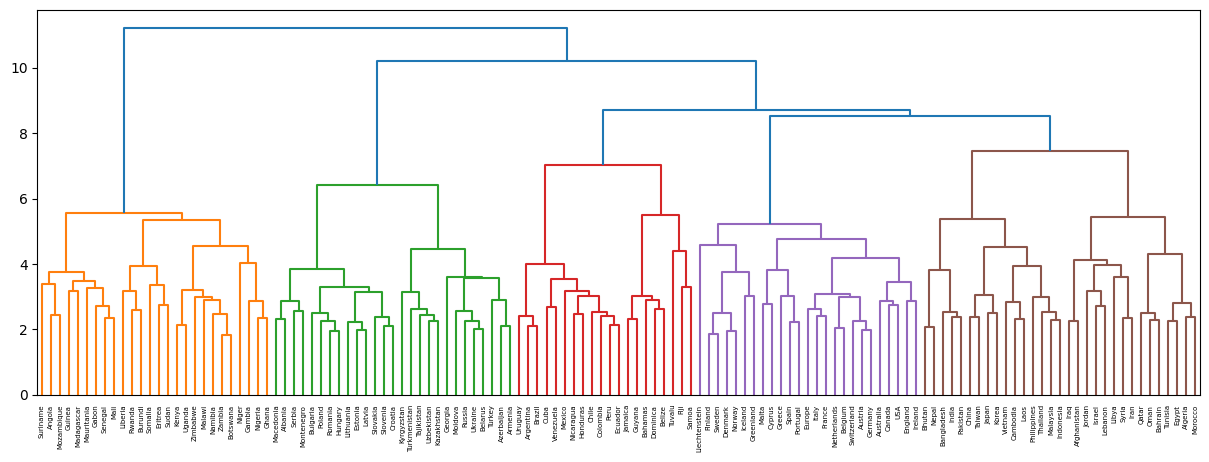

In [45]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage

plt.figure(figsize=(15, 5))
Z = linkage(cou_vec, method='ward')
dendrogram(Z, labels=countries)
plt.show()

## 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ

In [49]:
import bhtsne

embedded = bhtsne.tsne(np.array(cou_vec).astype(np.float64), dimensions=2, rand_seed=123)
plt.figure(figsize=(10, 10))
plt.scatter(np.array(embedded).T[0], np.array(embedded).T[1])
for (x, y), name in zip(embedded, countries):
    plt.annotate(name, (x, y))
plt.show()


ModuleNotFoundError: No module named 'bhtsne'

In [47]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
embedded_vectors = tsne.fit_transform(cou_vec)

plt.figure(figsize=(10, 10))
plt.scatter(embedded_vectors[:, 0], embedded_vectors[:, 1])

for i, label in enumerate(countries):
    plt.annotate(label, (embedded_vectors[1, 0], embedded_vectors[i, 1]))

plt.show()

AttributeError: 'list' object has no attribute 'shape'